# Sprint 機械学習スクラッチ入門

## 1.このSprintについて
<u>Sprintの目的</u>    
・機械学習スクラッチの準備をする 

<u>どのように学ぶか</u>  
今後の機械学習スクラッチ課題で作成するモデルを、scikit-learnを用いて一度動かしておきます。これまでの復習を兼ねたスクラッチ課題の準備です。

## 2.スクラッチ
このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

<u>スクラッチの意義</u>  
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、  
scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。


スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、　　
アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。


以下のような効果を狙っています。

・新たな手法に出会った時に理論・数式を理解しやすくする  
・ライブラリを使う上での曖昧さを減らす  
・既存の実装を読みやすくする  

In [169]:
import numpy as np
import pandas as pd


## 【問題1】train_test_splitのスクラッチ

スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [170]:
import numpy as np
import random

def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    
    # リストの場合を想定してn×1の2次元にreshape
    # y = y.reshape(len(y),1)
    
    # データ結合
    data = np.concatenate([X, y], axis = 1)
    #print("data.shape = {}".format(data.shape))
    
    # データシャッフル
    np.random.shuffle(data)
    
    # 再度X,yを分離
    X = data[:,0:(data.shape[1] - 1)]
    y = data[:,data.shape[1]-1].reshape(-1,1)
    #print("X.shape={}".format(X.shape))
    #print("y.shape={}".format(y.shape))
    
    X_train, X_test = np.vsplit(X, [int(data.shape[0]*train_size)])
    y_train, y_test = np.vsplit(y, [int(data.shape[0]*train_size)])
    
    return X_train, X_test, y_train, y_test

In [171]:
X_train, X_test, y_train, y_test = scratch_train_test_split(iris_X, iris_y, train_size = 0.8)

In [172]:
X_train

array([[6.7, 3.1, 4.4, 1.4],
       [6.9, 3.1, 5.4, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 2. , 3.5, 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 3. , 4.1, 1.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.2, 3.4, 5.4, 2.3],
       [6.5, 3.2, 5.1, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [5.5, 2.6, 4.4, 1.2],
       [7.2, 3.2, 6. , 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.1, 5.1, 2.3],
       [5.6, 2.9, 3.6, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [4.9, 2.4, 3.3, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 4.1, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.5, 2.4, 3.8, 1.1],
       [6.9, 3.1, 4.9, 1.5],
       [6.4, 2.8, 5.6, 2.2],
       [7. , 3.2, 4.7, 1.4],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 2

In [173]:
y_train

array([[1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],

### scikit-learnと比較

In [174]:
from sklearn.model_selection import train_test_split

skl_X_train, skl_X_test, skl_y_train, skl_y_test = train_test_split(iris_X, iris_y, train_size = 0.8)

In [175]:
skl_X_train

array([[5.6, 2.7, 4.2, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.9, 5.6, 1.8],
       [6.3, 3.3, 6. , 2.5],
       [5.6, 3. , 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [7.7, 3. , 6.1, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [7.4, 2.8, 6.1, 1.9],
       [4.9, 2.4, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [6. , 3. , 4.8, 1.8],
       [7.7, 2.8, 6.7, 2. ],
       [6.5, 2.8, 4.6, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [5. , 2. , 3.5, 1. ],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [7.7, 3.8, 6.7, 2.2],
       [5. , 2.3, 3.3, 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [5.8, 2.7, 4.1, 1. ],
       [5.8, 2

In [176]:
skl_y_train

array([[1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1]])

## 3.scikit-learnを用いて機械学習を行うコードを作成
scikit-learnを使ったコードを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

<u>分類問題</u>
分類は3種類の手法をスクラッチします。


・ロジスティック回帰  
・SVM  
・決定木  

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。


[sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
[sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

データセットは3種類用意します。


1つ目は事前学習期間同様にirisデータセットです。


[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)


2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。


virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。


**シンプルデータセット1作成コード**
```python
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
```


**シンプルデータセット2作成コード**

```python
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
```

## 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

### ＜irisデータセット＞

In [177]:
import pandas as pd
from sklearn.datasets import load_iris

# アヤメセットを読み込む
iris_data = load_iris()

# 説明変数
df_X = pd.DataFrame(iris_data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])


# 目的変数
df_y = pd.DataFrame(iris_data.target, columns=["species"])

df = pd.concat([df_X, df_y], axis=1)

#data = df.loc[:,["sepal_length","petal_length","species"]][df["species"] != 0]
data_X = df.iloc[:,0:4][df["species"] != 0]
data_y = df.iloc[:,4][df["species"] != 0]

X = np.array(data_X)
y = np.array(data_y).reshape(-1,1)

ds_iris={}

ds_iris["X"] = X
ds_iris["y"] = y

### ＜シンプルデータセット1＞

In [178]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))

X = X[random_index]
y = y[random_index].reshape(-1,1)

ds_simple1={}

ds_simple1["X"] = X
ds_simple1["y"] = y

In [179]:
ds_simple1["X"].shape

(500, 2)

### ＜シンプルデータセット2＞

In [180]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y = y.reshape(-1,1)

ds_simple2={}

ds_simple2["X"] = X
ds_simple2["y"] = y

In [181]:
ds_simple2["X"].shape

(40, 2)

・ロジスティック回帰    
・SVM    
・決定木    

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [182]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### ＜ロジスティック回帰＞

#### (irisDataset)

In [193]:
from sklearn import linear_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"], ds_iris["y"], train_size=0.8)

# モデル設定
model_SGD = linear_model.SGDClassifier(max_iter=1000, loss = "log")

# 学習
clf = model_SGD.fit(X_train, y_train.flatten())

# 推定
y_pred_SGD = model_SGD.predict(X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_SGD = classification_report(y_test, y_pred_SGD.reshape(-1,1), target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SGD = pd.DataFrame(cr_SGD)
display(df_cr_SGD)

print("X_train[:,0:2].shape = {}".format(X_train[:,0:2].shape))



,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.800000,1.000000,0.9,0.900000,0.92000
recall,1.000000,0.833333,0.9,0.916667,0.90000
f1-score,0.888889,0.909091,0.9,0.898990,0.90101
support,8.000000,12.000000,0.9,20.000000,20.00000


X_train[:,0:2].shape = (80, 2)


#### グラフ表示の為、２つの特徴量をピックアップする。

In [279]:
from sklearn import linear_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"][:,0:2], ds_iris["y"], train_size=0.8)

# モデル設定
model_SGD = linear_model.SGDClassifier(max_iter=1000, loss = "log")

# 学習
clf = model_SGD.fit(X_train, y_train.flatten())

# 推定
y_pred_SGD = model_SGD.predict(X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_SGD = classification_report(y_test, y_pred_SGD.reshape(-1,1), target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SGD = pd.DataFrame(cr_SGD)
display(df_cr_SGD)

print("X_train[:,0:2].shape = {}".format(X_train[:,0:2].shape))



,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.833333,0.571429,0.65,0.702381,0.715476
recall,0.454545,0.888889,0.65,0.671717,0.650000
f1-score,0.588235,0.695652,0.65,0.641944,0.636573
support,11.000000,9.000000,0.65,20.000000,20.000000


X_train[:,0:2].shape = (80, 2)


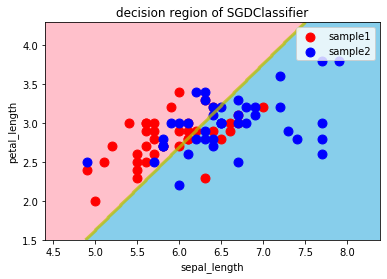

In [280]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), clf, title='decision region of SGDClassifier', target_names = target_names, xlabel='sepal_length', ylabel='petal_length')

#### (SimpleDataset1)

In [281]:
from sklearn import linear_model
from sklearn.metrics import classification_report

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple1["X"], ds_simple1["y"], train_size=0.8)

# モデル設定
model_SGD = linear_model.SGDClassifier(max_iter=1000, loss = "log")

# 学習
clf = model_SGD.fit(X_train, y_train.flatten())

# 推定
y_pred_SGD = model_SGD.predict(X_test)

# 評価
cr_SGD = classification_report(y_test, y_pred_SGD.reshape(-1,1), output_dict=True)

# pandas.DataFrameへ変換
df_cr_SGD = pd.DataFrame(cr_SGD)
display(df_cr_SGD)


,-1.0,1.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,46.0,54.0,1.0,100.0,100.0


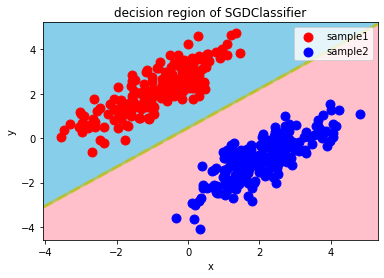

In [282]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_SGD, title='decision region of SGDClassifier', target_names = target_names, xlabel='x', ylabel='y')

#### (SimpleDataset2)

In [283]:
from sklearn import linear_model
from sklearn.metrics import classification_report

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple2["X"], ds_simple2["y"], train_size=0.8)

# モデル設定
model_SGD = linear_model.SGDClassifier(max_iter=1000, loss = "log")

# 学習
clf = model_SGD.fit(X_train, y_train.flatten())

# 推定
y_pred_SGD = model_SGD.predict(X_test)

# 評価
cr_SGD = classification_report(y_test, y_pred_SGD.reshape(-1,1), output_dict=True)

# pandas.DataFrameへ変換
df_cr_SGD = pd.DataFrame(cr_SGD)
display(df_cr_SGD)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.60,1.00,0.75,0.80,0.85
recall,1.00,0.60,0.75,0.80,0.75
f1-score,0.75,0.75,0.75,0.75,0.75
support,3.00,5.00,0.75,8.00,8.00


In [284]:
ds_simple2["X"].shape

(40, 2)

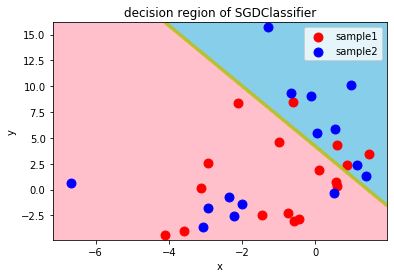

In [285]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_SGD, title='decision region of SGDClassifier', target_names = target_names, xlabel='x', ylabel='y')

### ＜SVM＞

#### (irisDataset)

In [131]:
from sklearn.svm import SVC

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"], ds_iris["y"], train_size=0.8)

# SVM
model_SVC = SVC()

# 学習
clf = model_SVC.fit(X_train, y_train.flatten())

# 推定
y_pred_SVM = model_SVC.predict(X_test)

# 評価
cr_SVN = classification_report(y_test, y_pred_SVM, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
display(df_cr_SVN)

,1.0,2.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,14.0,6.0,1.0,20.0,20.0


#### グラフ表示の為、２つの特徴量をピックアップする。

In [250]:
from sklearn.svm import SVC

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"][:,0:2], ds_iris["y"], train_size=0.8)

# SVM
model_SVC = SVC()

# 学習
clf = model_SVC.fit(X_train, y_train.flatten())

# 推定
y_pred_SVM = model_SVC.predict(X_test)

# 評価
cr_SVN = classification_report(y_test, y_pred_SVM, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
display(df_cr_SVN)

,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.625000,0.583333,0.6,0.604167,0.604167
recall,0.500000,0.700000,0.6,0.600000,0.600000
f1-score,0.555556,0.636364,0.6,0.595960,0.595960
support,10.000000,10.000000,0.6,20.000000,20.000000


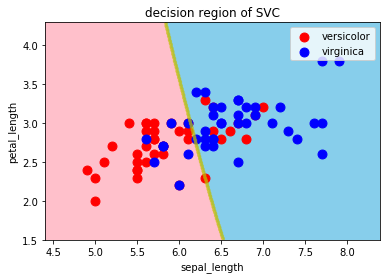

In [251]:
# 可視化
decision_region(X_train, y_train.flatten(), clf, title='decision region of SVC', xlabel='sepal_length', ylabel='petal_length')

#### (SimpleDataset1)

In [270]:
from sklearn.svm import SVC

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple1["X"], ds_simple1["y"], train_size=0.8)

# SVM
model_SVC = SVC()

# 学習
clf = model_SVC.fit(X_train, y_train.flatten())

# 推定
y_pred_SVM = model_SVC.predict(X_test)

# 評価
cr_SVN = classification_report(y_test, y_pred_SVM, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
display(df_cr_SVN)


,-1.0,1.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,46.0,54.0,1.0,100.0,100.0


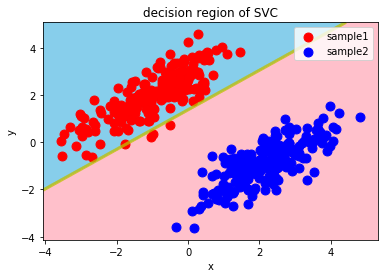

In [271]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_SGD, title='decision region of SVC', target_names = target_names, xlabel='x', ylabel='y')

#### (SimpleDataset2)

In [268]:
from sklearn.svm import SVC

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple2["X"], ds_simple2["y"], train_size=0.8)

# SVM
model_SVC = SVC()

# 学習
clf = model_SVC.fit(X_train, y_train.flatten())

# 推定
y_pred_SVM = model_SVC.predict(X_test)

# 評価
cr_SVN = classification_report(y_test, y_pred_SVM, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
display(df_cr_SVN)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.500000,1.000000,0.625,0.750000,0.812500
recall,1.000000,0.400000,0.625,0.700000,0.625000
f1-score,0.666667,0.571429,0.625,0.619048,0.607143
support,3.000000,5.000000,0.625,8.000000,8.000000


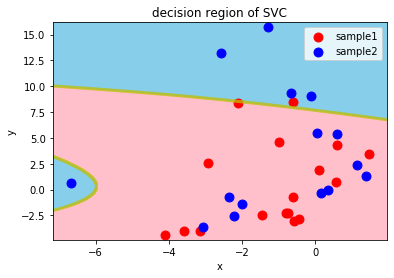

In [269]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_SVC, title='decision region of SVC', target_names = target_names, xlabel='x', ylabel='y')

In [108]:
y_test.shape

(8, 1)

### ＜決定木＞

#### (irisDataset)

In [132]:
from sklearn.tree import DecisionTreeClassifier

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"], ds_iris["y"], train_size=0.8)

# 決定木
model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_DT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)


,1.0,2.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,8.0,12.0,1.0,20.0,20.0


#### グラフ表示の為、２つの特徴量をピックアップする。

In [259]:
from sklearn.tree import DecisionTreeClassifier

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_iris["X"][:,0:2], ds_iris["y"], train_size=0.8)

# 決定木
model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_DT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)

,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.5,0.5,0.5,0.5,0.5
recall,0.5,0.5,0.5,0.5,0.5
f1-score,0.5,0.5,0.5,0.5,0.5
support,10.0,10.0,0.5,20.0,20.0


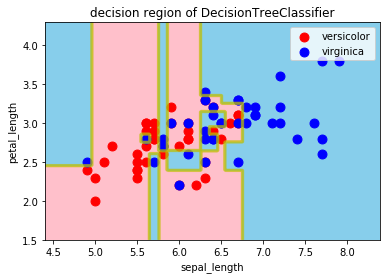

In [260]:
# 可視化
decision_region(X_train, y_train.flatten(), model_DT, title='decision region of DecisionTreeClassifier', xlabel='sepal_length', ylabel='petal_length')

#### (SimpleDataset1)

In [266]:
from sklearn.tree import DecisionTreeClassifier

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple1["X"], ds_simple1["y"], train_size=0.8)

# 決定木
model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_DT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)


,-1.0,1.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,49.0,51.0,1.0,100.0,100.0


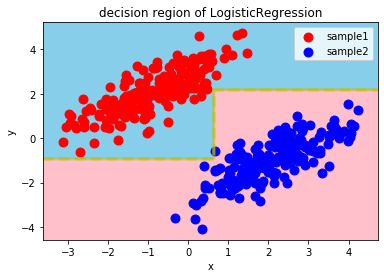

In [267]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_DT, title='decision region of LogisticRegression', target_names = target_names, xlabel='x', ylabel='y')

#### (SimpleDataset2)

In [263]:
from sklearn.tree import DecisionTreeClassifier

# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(ds_simple2["X"], ds_simple2["y"], train_size=0.8)

# 決定木
model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)

# 評価
cr_DT = classification_report(y_test, y_pred_DT, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.60,1.00,0.75,0.80,0.85
recall,1.00,0.60,0.75,0.80,0.75
f1-score,0.75,0.75,0.75,0.75,0.75
support,3.00,5.00,0.75,8.00,8.00


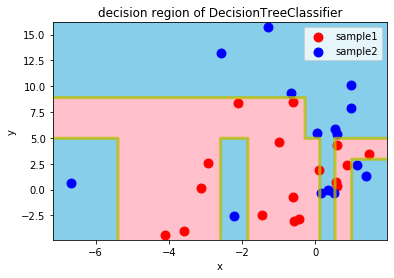

In [265]:
# 可視化
target_names = ['sample1','sample2']
decision_region(X_train, y_train.flatten(), model_DT, title='decision region of DecisionTreeClassifier', target_names = target_names, xlabel='x', ylabel='y')

#### <u>回帰問題</u>

回帰は1種類をスクラッチします。


・線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。

[sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

## 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

### 単回帰と重回帰で確認する。

### ＜データロード＞

In [286]:
df = pd.read_csv('./HousePrice_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [287]:
df_X = df.loc[:,["GrLivArea","YearBuilt"]]
df_y = df.loc[:,["SalePrice"]]

In [288]:
# ndarrayへ変換
X = np.array(df_X)
y = np.array(df_y)

In [289]:
# データ分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

In [290]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

### ＜線形回帰＞

#### （単回帰）-------------------------------------------------------------------------------------------------------------------
#### 各特徴量で単回帰を行う。

In [298]:
# 線形回帰
model_LR_GrLivArea = SGD()
model_LR_YearBuilt = SGD()

# 学習
## 単回帰
model_LR_GrLivArea.fit(ss_X_train[:,0].reshape(-1,1), y_train.flatten())
model_LR_YearBuilt.fit(ss_X_train[:,1].reshape(-1,1), y_train.flatten())

# 推定
y_pred_LR_GrLivArea = model_LR_GrLivArea.predict(ss_X_test[:,0].reshape(-1,1))
y_pred_LR_YearBuilt = model_LR_YearBuilt.predict(ss_X_test[:,1].reshape(-1,1))

# 評価
MSE_LR_GrLivArea = MSE(y_test, y_pred_LR_GrLivArea)
print("GrLivArea平均二乗誤差:{}".format(MSE_LR_GrLivArea))
MSE_LR_YearBuilt = MSE(y_test, y_pred_LR_YearBuilt)
print("YearBuilt平均二乗誤差:{}".format(MSE_LR_YearBuilt))


GrLivArea平均二乗誤差:4188014101.3414097
YearBuilt平均二乗誤差:5208757988.113273


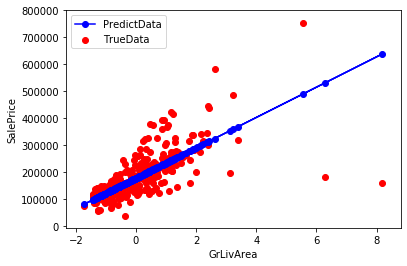

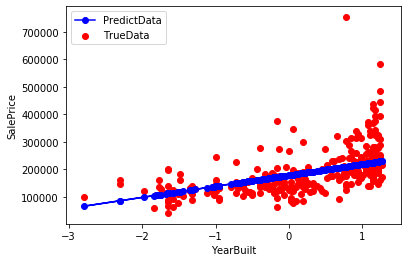

In [299]:
plt.plot(ss_X_test[:,0], y_pred_LR_GrLivArea, color="blue",label = "PredictData", marker="o")
plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.plot(ss_X_test[:,1], y_pred_LR_YearBuilt, color="blue",label = "PredictData", marker="o")
plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

#### （重回帰）
#### 2つの特徴量で重回帰を行う

In [300]:
# 線形回帰
import numpy as np
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
%matplotlib inline

model_SGD = SGD()

# 学習
model_SGD.fit(ss_X_train, y_train.flatten())

# 推定
y_pred_SGD = model_SGD.predict(ss_X_test)

# 評価
MSE_LR = MSE(y_test, y_pred_SGD.reshape(-1,1))
print("平均二乗誤差:{}".format(MSE_LR))

平均二乗誤差:3205232810.765389


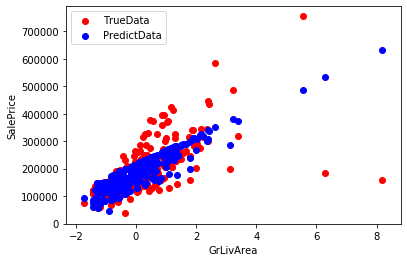

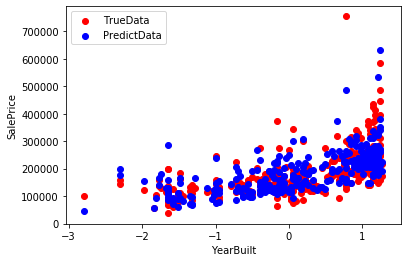

In [301]:
plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_SGD, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_SGD, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()